In [1]:
!pip3 install neuralprophet

In [3]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

In [4]:
data_frame = pd.read_csv('weatherAUS.csv')
data_frame.head()

,date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
data_frame.Location.unique()
# we're looking for Sydney

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [6]:
# gives us all the variables in the dataset
data_frame.columns

Index(['date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
# check what type the date variable is -> is an object but we want it to be a datetime object
data_frame.dtypes

date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [8]:
syd = data_frame[data_frame['Location']=='Sydney']
# convert all dates with location sydney to datetime objects so that we can use it in the time-series model
syd['Date'] = pd.to_datetime(syd['date'])
syd.head()

WARNING - (py.warnings._showwarnmsg) - /var/folders/sr/s6xzn8190t57p7gq2515t23r0000gn/T/ipykernel_86603/1141078580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syd['Date'] = pd.to_datetime(syd['date'])



,date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes,2008-02-01
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,2008-02-02
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,2008-02-03
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,2008-02-04
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,2008-02-05


In [9]:
syd.dtypes
# now date is of type datetime

date                     object
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
Date             datetime64[ns]
dtype: object

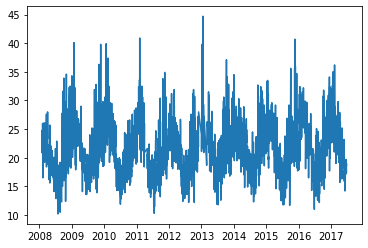

In [10]:
plt.plot(syd['Date'], syd['Temp3pm'])
plt.show()
# general weather/temp pattern is repeated every year on plot showing that we can use a time-series algorithm to predict future weather events with this dataset

In [11]:
data = syd[['Date', 'Temp3pm']]
# make sure data doesn't have any datapoints that are null
data.dropna(inplace=True)
# neural prophet takes in columns of ds and y 
data.columns = ['ds', 'y']
data.tail()

WARNING - (py.warnings._showwarnmsg) - /opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
33515,2017-06-21,17.9
33516,2017-06-22,18.7
33517,2017-06-23,17.3
33518,2017-06-24,19.0
33519,2017-06-25,18.8


In [12]:
# train model

m = NeuralProphet()


# split dataset

train = data.head(2228)
test  = data.tail(1114)

train_metrics = m.fit(train, freq='D', epochs=900)
test_metrics = m.test(test)
predicted_from_testing = m.predict(test)
# print(test_metrics["MAE"].values)
print("MAE: " + str(test_metrics["MAE"].values))
print("RMSE: " + str(test_metrics["RMSE"].values))

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.65E-02, min: 1.27E+00


  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.11E-02, min: 1.01E+00


  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.60E-02, min: 1.27E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.11E-02
Epoch[900/900]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 900/900 [00:30<00:00, 29.06it/s, SmoothL1Loss=0.014, MAE=2.15, RMSE=2.91, RegLoss=0]
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.016  2.416  3.157


MAE: [2.41593273]
RMSE: [3.15705466]


In [21]:
# predict

print(test.head())





              ds     y
32406 2014-06-08  16.0
32407 2014-06-09  16.9
32408 2014-06-10  18.8
32409 2014-06-11  17.7
32410 2014-06-12  19.5


<Figure size 3000x2400 with 0 Axes>

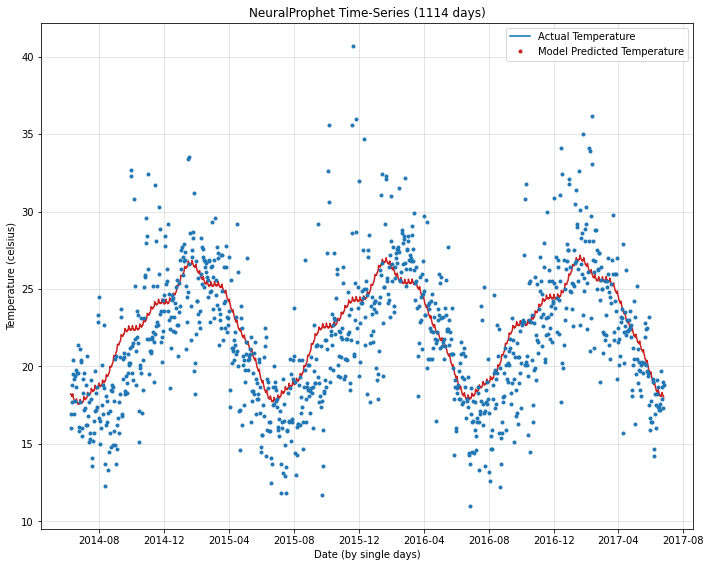

In [33]:
# predicted_from_testing.plot(figsize=(12,6))
# plot1 = m.plot(predicted_from_testing)
from matplotlib.pyplot import figure
figure(figsize=(10,8), dpi=300)
plot1 = m.plot(predicted_from_testing)
plt.title("NeuralProphet Time-Series (1114 days)")
plt.xlabel("Date (by single days)")
plt.ylabel("Temperature (celsius)")
plt.legend(['Actual Temperature', 'Model Predicted Temperature'])



ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[1].set_color('#CB2121')
for ax in plt.gcf().axes:
    ax.get_lines()[0].set_color("#CB2121")
    ax.get_lines()[1].set_color("#1F77B4")
# downloading figure
fig1 = plt.gcf()
fig1.set_size_inches(10,8)
plt.draw()
plt.savefig('neural-prophet-test.png', dpi=250, bbox_inches='tight')
plt.show()

In [15]:
# forecast.tail()
# print(forecast['yhat1'])
print('mean absolute error: ' + str(test_metrics['MAE'].values))
print('root mean squared error: ' + str(test_metrics['RMSE'].values))

mean absolute error: [2.41593273]
root mean squared error: [3.15705466]


In [16]:
# plt.plot(forecast, test)
print(test)
final_test = pd.DataFrame(data=test)
# yhat1 = (forecast['yhat1'])
# print(yhat1)
# final_test = final_test.join(yhat1)
print(final_test)
# print(final_test)
# plot1 = m.plot(forecast)
# plt.plot(forecast['yhat1'], test['y'])

              ds     y
32406 2014-06-08  16.0
32407 2014-06-09  16.9
32408 2014-06-10  18.8
32409 2014-06-11  17.7
32410 2014-06-12  19.5
...          ...   ...
33515 2017-06-21  17.9
33516 2017-06-22  18.7
33517 2017-06-23  17.3
33518 2017-06-24  19.0
33519 2017-06-25  18.8

[1114 rows x 2 columns]
              ds     y
32406 2014-06-08  16.0
32407 2014-06-09  16.9
32408 2014-06-10  18.8
32409 2014-06-11  17.7
32410 2014-06-12  19.5
...          ...   ...
33515 2017-06-21  17.9
33516 2017-06-22  18.7
33517 2017-06-23  17.3
33518 2017-06-24  19.0
33519 2017-06-25  18.8

[1114 rows x 2 columns]


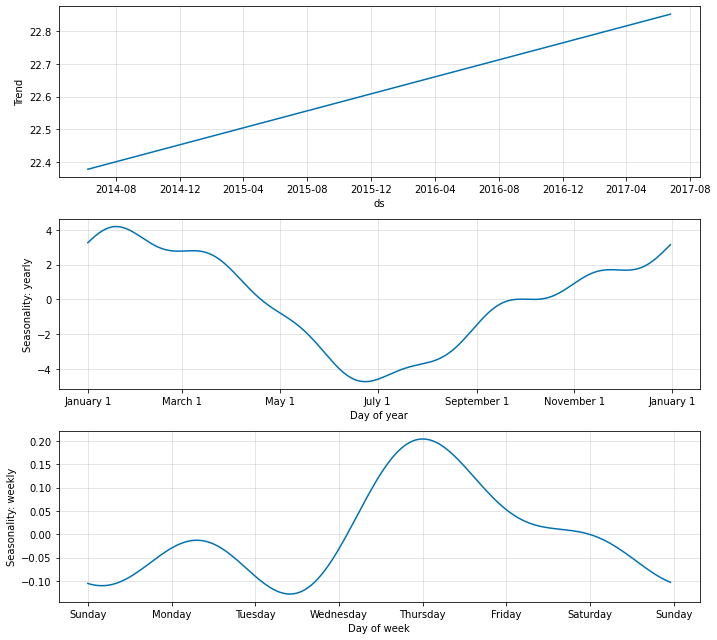

In [17]:
plot2 = m.plot_components(predicted_from_testing)

In [18]:
# forcasting future 

# predicting 35 years in the future
future = m.make_future_dataframe(data, periods=365 * 35)
forecast = m.predict(future)
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2017-06-26,None,18.104963,NaN,22.851746,-4.717238,-0.029543
1,2017-06-27,None,18.060436,NaN,22.852169,-4.701811,-0.089923
2,2017-06-28,None,18.139496,NaN,22.852596,-4.682234,-0.030865
3,2017-06-29,None,18.398197,NaN,22.853020,-4.658850,0.204029
4,2017-06-30,None,18.273731,NaN,22.853445,-4.632023,0.052309


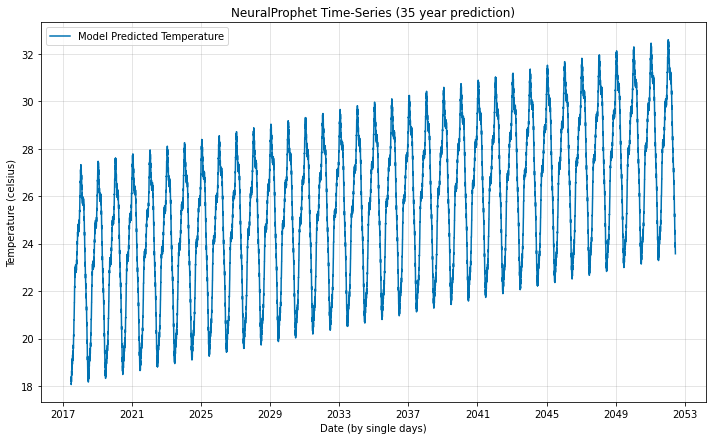

In [19]:
forecast_plot = m.plot(forecast)
plt.title("NeuralProphet Time-Series (35 year prediction)")
plt.xlabel("Date (by single days)")
plt.ylabel("Temperature (celsius)")
plt.legend(['Model Predicted Temperature'])

# downloading figure
fig1 = plt.gcf()
plt.draw()
plt.savefig('neural-prophet-35-year-forecast.png', dpi=300, bbox_inches='tight')
plt.show()

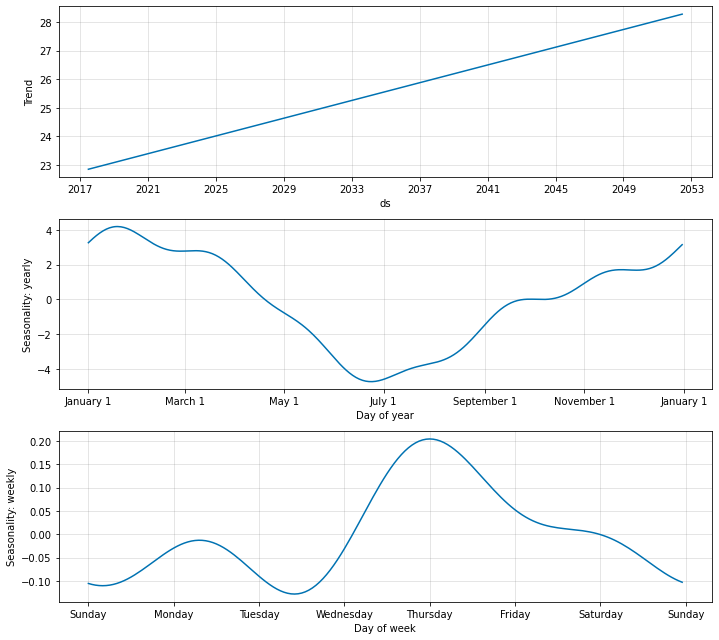

In [20]:
forecast_plot_components = m.plot_components(forecast)
plt.savefig('neural-prophet-35-year-forecast-components.png', dpi=300, bbox_inches='tight')
plt.show()

In [2]:
# save model 
with open('forecast_model.pkl', 'wb') as f: 
    pickle.dump(m, f)

NameError: name 'pickle' is not defined